# Dinâmica do "Spruce budworm"
O modelo da Larva do pinheiro, é um modelo clássico em ecologia. Sua dinâmica, influenciada pela predação de pássaros, é dada pela seguinte equação diferencial:

$$\frac{dB}{dt}=r_B B\left(1-\frac{B}{K_B}\right)-\beta\frac{B^2}{\alpha^2  + B^2}$$

#### Exercício 1:
Explique o significado dos termos desta equação.

In [3]:
%display typeset
# dBdt: variação da população de larvas ao longo do tempo (indivíduos/tempo)
# r_B: taxa de crescimento da população de larvas (1/tempo)
# B: população de larvas (indivíduos)
# K_B: capacidade do sistema (indivíduos)
# beta: taxa de predação (indivíduos/tempo)
# alpha: eficiência do predador (indivíduos)

#### Exercício 2:
Escreva o modelo em forma adimensional. Há mais de uma maneira de se adimensionalizar este modelo. Distcuta as opções e justifique a sua escolha.

In [2]:
var('B t R_B K_B beta alpha')
dBdt = R_B*B*(1-B/K_B) - beta*(B**2/(alpha**2 + B**2))
pretty_print(dBdt)

-B*R_B*(B/K_B - 1) - B^2*beta/(B^2 + alpha^2)

In [15]:
pretty_print(html("Fazemos:"))
show(html(r"$(R_B  B  \alpha) / \alpha$  ; e $(B^2 / \alpha^2) / (\alpha^2/\alpha^2 + N^2/\alpha^2)$ , onde $u = B/\alpha$"))
# Teremos:
var('B t R_B u K_B beta A')
dBdt = R_B*u*A*(1-B/K_B) - beta*(u**2/(1 + u**2))
pretty_print(dBdt)

Fazemos:

<script type="math/tex">(R_B  B  \alpha) / \alpha</script>  ; e <script type="math/tex">(B^2 / \alpha^2) / (\alpha^2/\alpha^2 + N^2/\alpha^2)</script> , onde <script type="math/tex">u = B/\alpha</script>

-A*R_B*u*(B/K_B - 1) - beta*u^2/(u^2 + 1)

Multiplicamos tudo por $1/\beta$ e fazemos $v = (R_B \alpha) (1/\beta)$

Teremos:
$$\frac{dB}{dt} \frac{1}{\beta} = v u \frac{1-B}{K_B} - \frac{u^2}{(1 + u^2)}$$
Fazemos $K_B = y \alpha$ e substituímos. Como $u = \frac{B}{\alpha}$, teremos:
$$\frac{dB}{dt} \frac{1}{\beta} = v u \left(1 - \frac{u}{y}\right) - \frac{u^2}{(1 + u^2)}$$
Passando o $\frac{1}{\beta}$ para o outro lado, teremos:

In [16]:
var('beta t v u y')
dBdt = beta * (v*u*(1 - u/y) - (u**2/(1 + u**2)))
pretty_print(dBdt)

-(u*v*(u/y - 1) + u^2/(u^2 + 1))*beta

Sendo que só o beta ainda está com dimensão, sendo esta indivíduos sobre tempo.

Logo, fazendo $z = \frac{\beta t}{\alpha}$, teremos a adimensionalização

In [17]:

var('z t v u y')
dzdt = (v*u*(1 - u/y) - (u**2/(1 + u**2)))
pretty_print(dzdt)

-u*v*(u/y - 1) - u^2/(u^2 + 1)

#### Exercício 3
Mostre que $B=0$ é um equilíbrio instável.

In [18]:
# Equação original:
var('B t R_B K_B beta alpha')
dBdt = R_B*B*(1-B/K_B) - beta*(B**2/(alpha**2 + B**2))
pretty_print(solve([dBdt == 0], B))

[B == -1/3*(1/2)^(2/3)*(K_B^2 - 3*(R_B*alpha^2 + K_B*beta)/R_B)*(-I*sqrt(3) + 1)/(2*K_B^3 + 27*K_B*alpha^2 - 9*(R_B*alpha^2 + K_B*beta)*K_B/R_B + 9*sqrt(1/3)*sqrt((4*K_B^4*R_B^3*alpha^2 + 8*K_B^2*R_B^3*alpha^4 + 4*R_B^3*alpha^6 + 4*K_B^3*beta^3 - (K_B^4*R_B - 12*K_B^2*R_B*alpha^2)*beta^2 - 4*(5*K_B^3*R_B^2*alpha^2 - 3*K_B*R_B^2*alpha^4)*beta)/R_B)/R_B)^(1/3) - 1/6*(1/2)^(1/3)*(2*K_B^3 + 27*K_B*alpha^2 - 9*(R_B*alpha^2 + K_B*beta)*K_B/R_B + 9*sqrt(1/3)*sqrt((4*K_B^4*R_B^3*alpha^2 + 8*K_B^2*R_B^3*alpha^4 + 4*R_B^3*alpha^6 + 4*K_B^3*beta^3 - (K_B^4*R_B - 12*K_B^2*R_B*alpha^2)*beta^2 - 4*(5*K_B^3*R_B^2*alpha^2 - 3*K_B*R_B^2*alpha^4)*beta)/R_B)/R_B)^(1/3)*(I*sqrt(3) + 1) + 1/3*K_B, B == -1/3*(1/2)^(2/3)*(K_B^2 - 3*(R_B*alpha^2 + K_B*beta)/R_B)*(I*sqrt(3) + 1)/(2*K_B^3 + 27*K_B*alpha^2 - 9*(R_B*alpha^2 + K_B*beta)*K_B/R_B + 9*sqrt(1/3)*sqrt((4*K_B^4*R_B^3*alpha^2 + 8*K_B^2*R_B^3*alpha^4 + 4*R_B^3*alpha^6 + 4*K_B^3*beta^3 - (K_B^4*R_B - 12*K_B^2*R_B*alpha^2)*beta^2 - 4*(5*K_B^3*R_B^2*alpha^2 - 3*K_B*R_B^2*alpha^4)*beta)/R_B)/R_B)^(1/3) - 1/6*(1/2)^(1/3)*(2*K_B^3 + 27*K_B*alpha^2 - 9*(R_B*alpha^2 + K_B*beta)*K_B/R_B + 9*sqrt(1/3)*sqrt((4*K_B^4*R_B^3*alpha^2 + 8*K_B^2*R_B^3*alpha^4 + 4*R_B^3*alpha^6 + 4*K_B^3*beta^3 - (K_B^4*R_B - 12*K_B^2*R_B*alpha^2)*beta^2 - 4*(5*K_B^3*R_B^2*alpha^2 - 3*K_B*R_B^2*alpha^4)*beta)/R_B)/R_B)^(1/3)*(-I*sqrt(3) + 1) + 1/3*K_B, B == 2/3*(1/2)^(2/3)*(K_B^2 - 3*(R_B*alpha^2 + K_B*beta)/R_B)/(2*K_B^3 + 27*K_B*alpha^2 - 9*(R_B*alpha^2 + K_B*beta)*K_B/R_B + 9*sqrt(1/3)*sqrt((4*K_B^4*R_B^3*alpha^2 + 8*K_B^2*R_B^3*alpha^4 + 4*R_B^3*alpha^6 + 4*K_B^3*beta^3 - (K_B^4*R_B - 12*K_B^2*R_B*alpha^2)*beta^2 - 4*(5*K_B^3*R_B^2*alpha^2 - 3*K_B*R_B^2*alpha^4)*beta)/R_B)/R_B)^(1/3) + 1/3*K_B + 1/3*(1/2)^(1/3)*(2*K_B^3 + 27*K_B*alpha^2 - 9*(R_B*alpha^2 + K_B*beta)*K_B/R_B + 9*sqrt(1/3)*sqrt((4*K_B^4*R_B^3*alpha^2 + 8*K_B^2*R_B^3*alpha^4 + 4*R_B^3*alpha^6 + 4*K_B^3*beta^3 - (K_B^4*R_B - 12*K_B^2*R_B*alpha^2)*beta^2 - 4*(5*K_B^3*R_B^2*alpha^2 - 3*K_B*R_B^2*alpha^4)*beta)/R_B)/R_B)^(1/3), B == 0]

/home/fccoelho/Downloads/SageMath/local/lib/python3.7/site-packages/sage/plot/graphics.py:2420: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/home/fccoelho/Downloads/SageMath/local/lib/python3.7/site-packages/sage/plot/graphics.py:2445: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


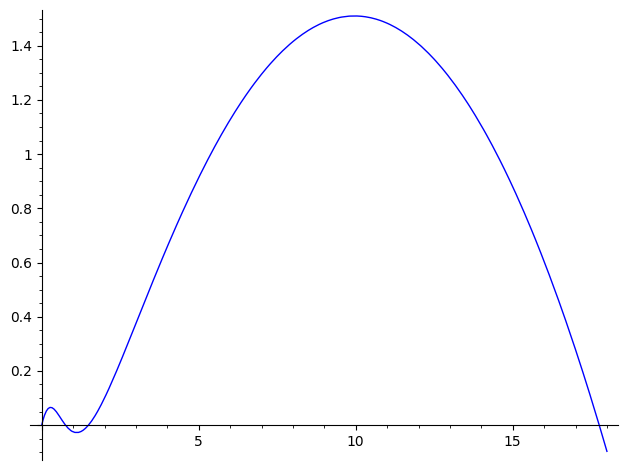

In [19]:
# Gráfico:
plot(0.5*B*(1-B/20) - 1*(B**2/(1**2 + B**2)),(B,0,18),ymax=1.5)

#### Exercício 4:
Quantos equilíbrios existem além de $B=0$?

In [20]:
# Além de B = 0 existem 3 equilíbrios (com autovalores complexos)

#### Exercício 5:
Plote o diagrama de bifurcação deste modelo, utilizando $β>0$ como parâmetro de bifurcação.

/home/fccoelho/Downloads/SageMath/local/lib/python3.7/site-packages/sage/plot/graphics.py:2420: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/home/fccoelho/Downloads/SageMath/local/lib/python3.7/site-packages/sage/plot/graphics.py:2445: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


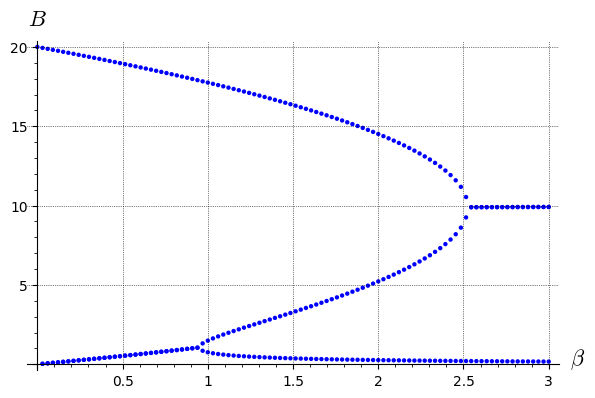

In [33]:
#Não está funcionado - adicionado em 20/09/16

forget ()

import numpy as np

def drawbif(func,l,u):
    pts = []
    for v in np.linspace(l,u,100):
        g = func(beta=v)
        xvals = solve(g,x)
#         print(xvals)
        pts.extend([(v,n(i.rhs().real_part())) for i in xvals if n(i.rhs().real_part())>0])
    
    show(points(pts),axes_labels=[r"$\beta$",'$B$'],gridlines=True, xmin=0)

var('beta')
R_B = 0.5
K_B = 20
alpha = 1
f = R_B*x*(1-x/K_B) - beta*(x**2/(alpha**2 + x**2))
drawbif(f,0,3)